In [7]:
from gurobipy import *

In [163]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.spatial.distance as dist
import geopandas as gpd
from itertools import product
import osmnx as ox
import networkx as nx
from datetime import timedelta
from shapely.geometry import Point

In [9]:
bkpoint = gpd.read_file('./cbBK26PointClean.geojson').to_crs('EPSG:4326')

In [10]:
bkpoint

,Geographic Area Name,Population,cdtaname,boroname_left,cdta2020,geoid,Demand,geometry
0,"Block 1000, Block Group 1, Census Tract 1, Kin...",25,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001000,1,POINT (-73.99414 40.70247)
1,"Block 1001, Block Group 1, Census Tract 1, Kin...",36,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001001,1,POINT (-73.99462 40.70261)
2,"Block 1004, Block Group 1, Census Tract 1, Kin...",14,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001004,1,POINT (-73.99340 40.70128)
3,"Block 1005, Block Group 1, Census Tract 1, Kin...",182,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001005,4,POINT (-73.99347 40.70221)
4,"Block 1006, Block Group 1, Census Tract 1, Kin...",17,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001006,1,POINT (-73.99552 40.70083)
...,...,...,...,...,...,...,...,...
807,"Block 2001, Block Group 2, Census Tract 545, K...",1234,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470545002001,27,POINT (-73.96734 40.70563)
808,"Block 1004, Block Group 1, Census Tract 547, K...",108,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470547001004,3,POINT (-73.96788 40.70722)
809,"Block 3004, Block Group 3, Census Tract 547, K...",1359,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470547003004,29,POINT (-73.96917 40.70852)
810,"Block 1002, Block Group 1, Census Tract 1237, ...",307,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360471237001002,7,POINT (-73.96034 40.69708)


In [35]:
distance = pd.read_csv('./distance_osm_meter.csv', index_col=0)

In [36]:
distance

,0,1,2,3,4,5,6,7,8,9,...,802,803,804,805,806,807,808,809,810,811
0,0.000,54.699,246.067,68.294,2934.311,2934.311,402.066,2934.311,630.631,657.772,...,3646.352,3866.373,3951.315,3945.408,3781.516,3951.315,4208.060,4641.286,3364.450,3437.100
1,174.852,0.000,420.919,124.019,2879.612,2879.612,576.918,2879.612,766.864,713.497,...,3702.077,3922.098,4007.040,4001.133,3837.241,4007.040,4263.785,4697.011,3420.175,3492.825
2,208.515,263.214,0.000,157.682,3142.826,3142.826,610.581,3142.826,642.380,589.013,...,3657.314,3877.335,3962.277,3956.370,3792.478,3962.277,4219.022,4652.248,3372.586,3445.236
3,50.833,105.532,296.900,0.000,2985.144,2985.144,452.899,2985.144,654.905,601.538,...,3590.118,3810.139,3895.081,3889.174,3725.282,3895.081,4151.826,4585.052,3308.216,3380.866
4,387.676,442.375,179.161,336.843,0.000,0.000,789.742,0.000,821.541,768.174,...,3757.035,3977.056,4061.998,4056.091,3892.199,4061.998,4318.743,4751.969,3500.051,3572.701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,3982.953,4037.652,4229.020,3932.120,6294.116,6294.116,4284.625,6294.116,4030.674,3977.307,...,341.823,412.337,0.000,171.499,327.480,0.000,256.745,689.971,1268.884,1341.534
808,4239.698,4294.397,4485.765,4188.865,6550.861,6550.861,4541.370,6550.861,4287.419,4234.052,...,598.568,669.082,256.745,428.244,584.225,256.745,0.000,433.226,1525.629,1598.279
809,4389.014,4443.713,4635.081,4338.181,6700.177,6700.177,4690.686,6700.177,4436.735,4383.368,...,872.510,818.398,530.687,570.245,733.541,530.687,273.942,0.000,1674.945,1747.595
810,3294.917,3349.616,3540.984,3244.084,5280.142,5280.142,3444.043,5280.142,3342.638,3289.271,...,962.222,1198.210,1283.152,1277.245,1113.353,1283.152,1539.897,1973.123,0.000,72.650


In [37]:
# assign 50 distance to some same demand nodes which distance between is 0

for i in range(len(distance)):
    for j in range(len(distance)):
        if distance.loc[i][j] == 0 and i!=j:
            distance.loc[i][j] = 50
        else:
            pass

In [40]:
distance

,0,1,2,3,4,5,6,7,8,9,...,802,803,804,805,806,807,808,809,810,811
0,0.000,54.699,246.067,68.294,2934.311,2934.311,402.066,2934.311,630.631,657.772,...,3646.352,3866.373,3951.315,3945.408,3781.516,3951.315,4208.060,4641.286,3364.450,3437.100
1,174.852,0.000,420.919,124.019,2879.612,2879.612,576.918,2879.612,766.864,713.497,...,3702.077,3922.098,4007.040,4001.133,3837.241,4007.040,4263.785,4697.011,3420.175,3492.825
2,208.515,263.214,0.000,157.682,3142.826,3142.826,610.581,3142.826,642.380,589.013,...,3657.314,3877.335,3962.277,3956.370,3792.478,3962.277,4219.022,4652.248,3372.586,3445.236
3,50.833,105.532,296.900,0.000,2985.144,2985.144,452.899,2985.144,654.905,601.538,...,3590.118,3810.139,3895.081,3889.174,3725.282,3895.081,4151.826,4585.052,3308.216,3380.866
4,387.676,442.375,179.161,336.843,0.000,50.000,789.742,50.000,821.541,768.174,...,3757.035,3977.056,4061.998,4056.091,3892.199,4061.998,4318.743,4751.969,3500.051,3572.701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,3982.953,4037.652,4229.020,3932.120,6294.116,6294.116,4284.625,6294.116,4030.674,3977.307,...,341.823,412.337,50.000,171.499,327.480,0.000,256.745,689.971,1268.884,1341.534
808,4239.698,4294.397,4485.765,4188.865,6550.861,6550.861,4541.370,6550.861,4287.419,4234.052,...,598.568,669.082,256.745,428.244,584.225,256.745,0.000,433.226,1525.629,1598.279
809,4389.014,4443.713,4635.081,4338.181,6700.177,6700.177,4690.686,6700.177,4436.735,4383.368,...,872.510,818.398,530.687,570.245,733.541,530.687,273.942,0.000,1674.945,1747.595
810,3294.917,3349.616,3540.984,3244.084,5280.142,5280.142,3444.043,5280.142,3342.638,3289.271,...,962.222,1198.210,1283.152,1277.245,1113.353,1283.152,1539.897,1973.123,0.000,72.650


In [41]:
len(distance)

812

In [42]:
# demand multiple distance matrix
DemandDis = distance.copy()
for i in range(0,len(distance)):
    DemandDis.loc[i] = distance.loc[i]*bkpoint['Demand'][i]

In [43]:
DemandDis

,0,1,2,3,4,5,6,7,8,9,...,802,803,804,805,806,807,808,809,810,811
0,0.000,54.699,246.067,68.294,2934.311,2934.311,402.066,2934.311,630.631,657.772,...,3646.352,3866.373,3951.315,3945.408,3781.516,3951.315,4208.060,4641.286,3364.450,3437.100
1,174.852,0.000,420.919,124.019,2879.612,2879.612,576.918,2879.612,766.864,713.497,...,3702.077,3922.098,4007.040,4001.133,3837.241,4007.040,4263.785,4697.011,3420.175,3492.825
2,208.515,263.214,0.000,157.682,3142.826,3142.826,610.581,3142.826,642.380,589.013,...,3657.314,3877.335,3962.277,3956.370,3792.478,3962.277,4219.022,4652.248,3372.586,3445.236
3,203.332,422.128,1187.600,0.000,11940.576,11940.576,1811.596,11940.576,2619.620,2406.152,...,14360.472,15240.556,15580.324,15556.696,14901.128,15580.324,16607.304,18340.208,13232.864,13523.464
4,387.676,442.375,179.161,336.843,0.000,50.000,789.742,50.000,821.541,768.174,...,3757.035,3977.056,4061.998,4056.091,3892.199,4061.998,4318.743,4751.969,3500.051,3572.701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,107539.731,109016.604,114183.540,106167.240,169941.132,169941.132,115684.875,169941.132,108828.198,107387.289,...,9229.221,11133.099,1350.000,4630.473,8841.960,0.000,6932.115,18629.217,34259.868,36221.418
808,12719.094,12883.191,13457.295,12566.595,19652.583,19652.583,13624.110,19652.583,12862.257,12702.156,...,1795.704,2007.246,770.235,1284.732,1752.675,770.235,0.000,1299.678,4576.887,4794.837
809,127281.406,128867.677,134417.349,125807.249,194305.133,194305.133,136029.894,194305.133,128665.315,127117.672,...,25302.790,23733.542,15389.923,16537.105,21272.689,15389.923,7944.318,0.000,48573.405,50680.255
810,23064.419,23447.312,24786.888,22708.588,36960.994,36960.994,24108.301,36960.994,23398.466,23024.897,...,6735.554,8387.470,8982.064,8940.715,7793.471,8982.064,10779.279,13811.861,0.000,508.550


In [44]:
range(len(DemandDis))

range(0, 812)

In [45]:
# index
PtoP = list(product(range(len(DemandDis)), range(len(DemandDis))))

In [46]:
PtoP 

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 83),
 (0, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (0, 88),
 (0, 89),
 (0, 90),
 (0, 91),
 (0, 92),
 (0, 93),
 (0, 94),
 (0, 95),
 (0, 96),
 (0, 97),
 (0, 98),
 (0, 99),
 (0, 100),

In [47]:
# Gurobi p-median model

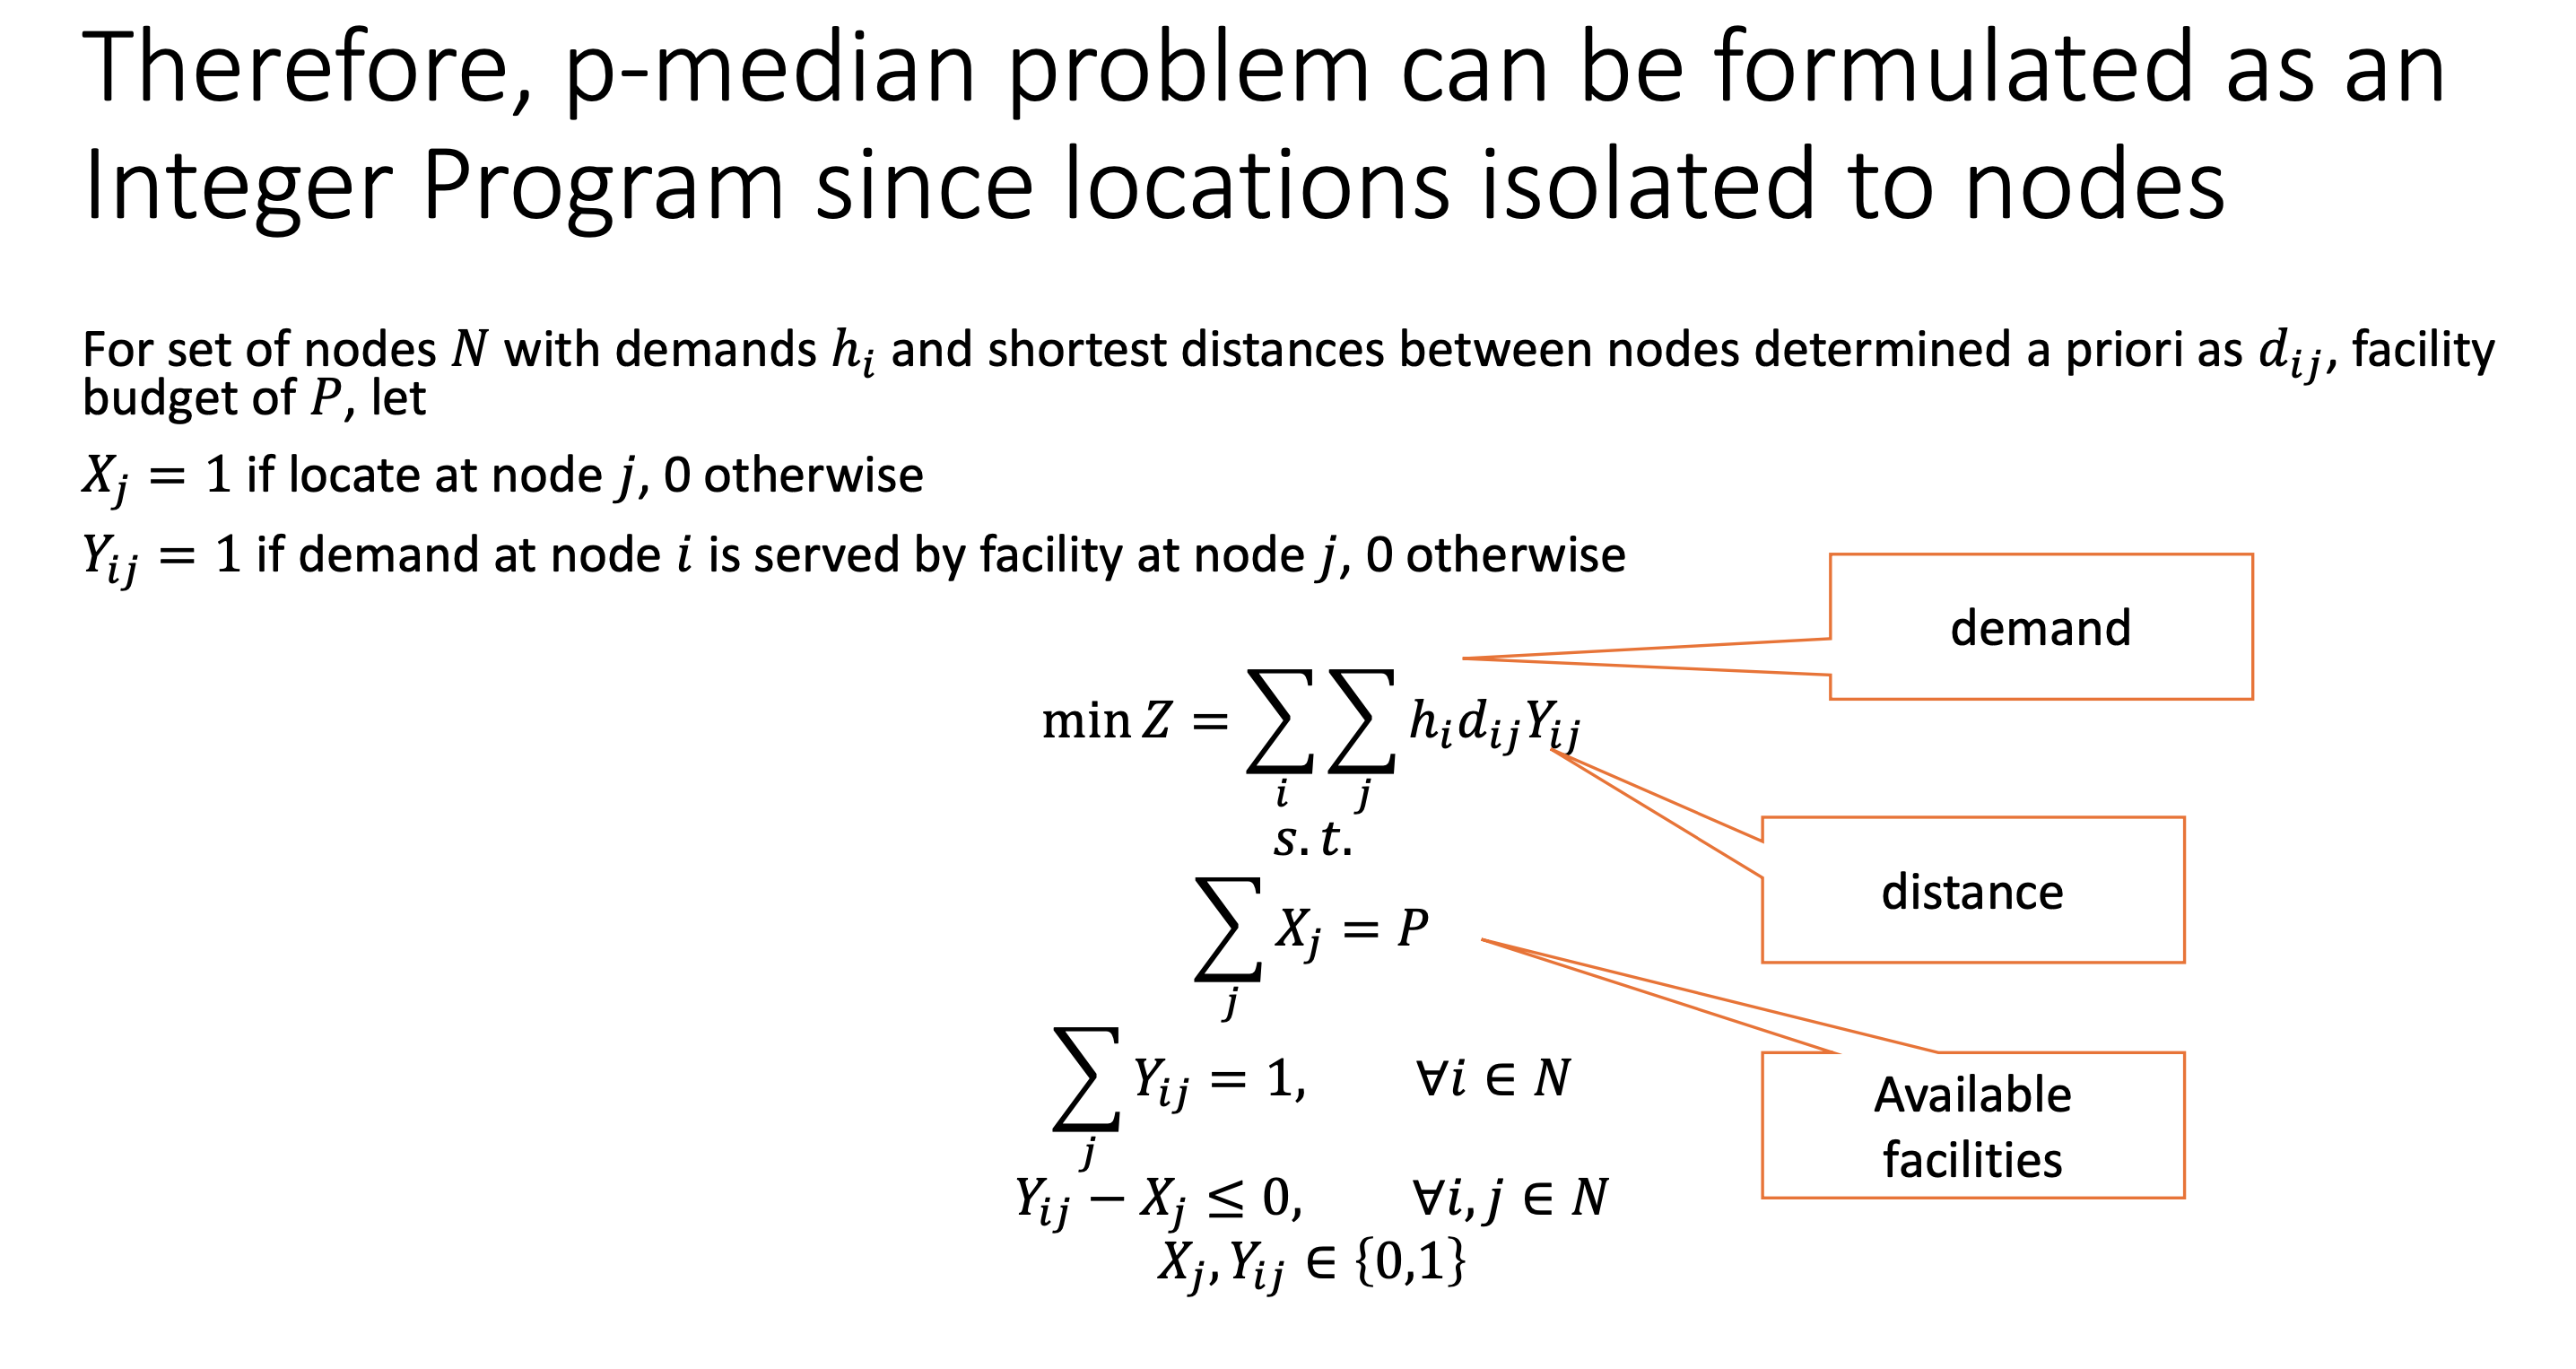

In [58]:
m = Model()

In [59]:
# decision variables y=node, x=deport
y = m.addVars(PtoP, lb=0, vtype=GRB.BINARY, name='y')
x = m.addVars(range(len(DemandDis)), lb=0, vtype=GRB.BINARY, name='x')

In [60]:
m.update()

In [61]:
# constrains
m.addConstr(quicksum(x[j] for j in range(len(DemandDis))) == 1) # deport number
m.addConstrs((quicksum(y[i,j] for j in range(len(DemandDis))) == 1) for i in range(len(DemandDis))) 
m.addConstrs(y[i,j]-x[j] <=0 for j in range(len(DemandDis)) for i in range(len(DemandDis)))

{(0, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 5): <gurobi.Constr *Awaiting Model Update*>,
 (0, 6): <gurobi.Constr *Awaiting Model Update*>,
 (0, 7): <gurobi.Constr *Awaiting Model Update*>,
 (0, 8): <gurobi.Constr *Awaiting Model Update*>,
 (0, 9): <gurobi.Constr *Awaiting Model Update*>,
 (0, 10): <gurobi.Constr *Awaiting Model Update*>,
 (0, 11): <gurobi.Constr *Awaiting Model Update*>,
 (0, 12): <gurobi.Constr *Awaiting Model Update*>,
 (0, 13): <gurobi.Constr *Awaiting Model Update*>,
 (0, 14): <gurobi.Constr *Awaiting Model Update*>,
 (0, 15): <gurobi.Constr *Awaiting Model Update*>,
 (0, 16): <gurobi.Constr *Awaiting Model Update*>,
 (0, 17): <gurobi.Constr *Awaiting Model Update*>,
 (0, 18): <gurobi.Constr *Awaiting Model Update*>,
 (0, 19): <gurobi.Constr *Awaiting Model 

In [62]:
m.update()

In [63]:
m.setObjective(quicksum(DemandDis.loc[i][j]*y[i,j] for i in range(len(DemandDis)) for j in range(len(DemandDis))), GRB.MINIMIZE)

In [64]:
m.update()

In [65]:
m.optimize()

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[rosetta2])
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads
Optimize a model with 660157 rows, 660156 columns and 1978844 nonzeros
Model fingerprint: 0x94f17919
Variable types: 0 continuous, 660156 integer (660156 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e+00, 2e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 1.484974e+07
Presolve removed 0 rows and 0 columns (presolve time = 112s) ...
Presolve removed 3208 rows and 3210 columns
Presolve time: 113.03s
Presolved: 656949 rows, 656946 columns, 1970030 nonzeros
Variable types: 0 continuous, 656946 integer (656946 binary)

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...


Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.1308547e+07   1.000000e+00   6.992775e+09   

In [66]:
m.ObjVal

11357070.171999991

In [67]:
m.printAttr('x')


    Variable            x 
-------------------------
    y[0,192]            1 
    y[1,192]            1 
    y[2,192]            1 
    y[3,192]            1 
    y[4,192]            1 
    y[5,192]            1 
    y[6,192]            1 
    y[7,192]            1 
    y[8,192]            1 
    y[9,192]            1 
   y[10,192]            1 
   y[11,192]            1 
   y[12,192]            1 
   y[13,192]            1 
   y[14,192]            1 
   y[15,192]            1 
   y[16,192]            1 
   y[17,192]            1 
   y[18,192]            1 
   y[19,192]            1 
   y[20,192]            1 
   y[21,192]            1 
   y[22,192]            1 
   y[23,192]            1 
   y[24,192]            1 
   y[25,192]            1 
   y[26,192]            1 
   y[27,192]            1 
   y[28,192]            1 
   y[29,192]            1 
   y[30,192]            1 
   y[31,192]            1 
   y[32,192]            1 
   y[33,192]            1 
   y[34,192]            1 
 

  y[302,192]            1 
  y[303,192]            1 
  y[304,192]            1 
  y[305,192]            1 
  y[306,192]            1 
  y[307,192]            1 
  y[308,192]            1 
  y[309,192]            1 
  y[310,192]            1 
  y[311,192]            1 
  y[312,192]            1 
  y[313,192]            1 
  y[314,192]            1 
  y[315,192]            1 
  y[316,192]            1 
  y[317,192]            1 
  y[318,192]            1 
  y[319,192]            1 
  y[320,192]            1 
  y[321,192]            1 
  y[322,192]            1 
  y[323,192]            1 
  y[324,192]            1 
  y[325,192]            1 
  y[326,192]            1 
  y[327,192]            1 
  y[328,192]            1 
  y[329,192]            1 
  y[330,192]            1 
  y[331,192]            1 
  y[332,192]            1 
  y[333,192]            1 
  y[334,192]            1 
  y[335,192]            1 
  y[336,192]            1 
  y[337,192]            1 
  y[338,192]            1 
 

  y[606,192]            1 
  y[607,192]            1 
  y[608,192]            1 
  y[609,192]            1 
  y[610,192]            1 
  y[611,192]            1 
  y[612,192]            1 
  y[613,192]            1 
  y[614,192]            1 
  y[615,192]            1 
  y[616,192]            1 
  y[617,192]            1 
  y[618,192]            1 
  y[619,192]            1 
  y[620,192]            1 
  y[621,192]            1 
  y[622,192]            1 
  y[623,192]            1 
  y[624,192]            1 
  y[625,192]            1 
  y[626,192]            1 
  y[627,192]            1 
  y[628,192]            1 
  y[629,192]            1 
  y[630,192]            1 
  y[631,192]            1 
  y[632,192]            1 
  y[633,192]            1 
  y[634,192]            1 
  y[635,192]            1 
  y[636,192]            1 
  y[637,192]            1 
  y[638,192]            1 
  y[639,192]            1 
  y[640,192]            1 
  y[641,192]            1 
  y[642,192]            1 
 

In [ ]:
# when p=1 no.192 is the optimal deport

In [75]:
OSM_point = gpd.read_file('./OSM_point.geojson')
OSM_point.head()

,Geographic Area Name,Population,cdtaname,boroname_left,cdta2020,geoid,Demand,lon,lat,coordinates,OSMID,OSM_lon,OSM_lat,geometry
0,"Block 1000, Block Group 1, Census Tract 1, Kin...",25,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001000,1,-73.994139,40.702474,"(40.70247439268394,-73.99413859995671)",3174844149,-73.993838,40.702615,POINT (-73.99384 40.70262)
1,"Block 1001, Block Group 1, Census Tract 1, Kin...",36,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001001,1,-73.994615,40.702615,"(40.70261488193135,-73.99461527000922)",3174844141,-73.994421,40.702830,POINT (-73.99442 40.70283)
2,"Block 1004, Block Group 1, Census Tract 1, Kin...",14,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001004,1,-73.993401,40.701283,"(40.70128292945475,-73.99340112808582)",6720148786,-73.993367,40.701572,POINT (-73.99337 40.70157)
3,"Block 1005, Block Group 1, Census Tract 1, Kin...",182,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001005,4,-73.993468,40.702211,"(40.70221089237134,-73.9934679333486)",3174844145,-73.993300,40.702408,POINT (-73.99330 40.70241)
4,"Block 1006, Block Group 1, Census Tract 1, Kin...",17,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001006,1,-73.995519,40.700831,"(40.70083095885802,-73.99551917724347)",451019469,-73.995156,40.700724,POINT (-73.99516 40.70072)


In [76]:
# put row 192 as row 0 because it is deport
target_row = 192
# Move target row to first element of list.
idx = [target_row] + [i for i in range(len(OSM_point)) if i != target_row]
OSM_point = OSM_point.reindex(idx)
OSM_point.head()

,Geographic Area Name,Population,cdtaname,boroname_left,cdta2020,geoid,Demand,lon,lat,coordinates,OSMID,OSM_lon,OSM_lat,geometry
192,"Block 1002, Block Group 1, Census Tract 39, Ki...",575,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470039001002,13,-73.981466,40.686022,"(40.68602237003382,-73.98146617380027)",42466290,-73.980702,40.685324,POINT (-73.98070 40.68532)
0,"Block 1000, Block Group 1, Census Tract 1, Kin...",25,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001000,1,-73.994139,40.702474,"(40.70247439268394,-73.99413859995671)",3174844149,-73.993838,40.702615,POINT (-73.99384 40.70262)
1,"Block 1001, Block Group 1, Census Tract 1, Kin...",36,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001001,1,-73.994615,40.702615,"(40.70261488193135,-73.99461527000922)",3174844141,-73.994421,40.702830,POINT (-73.99442 40.70283)
2,"Block 1004, Block Group 1, Census Tract 1, Kin...",14,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001004,1,-73.993401,40.701283,"(40.70128292945475,-73.99340112808582)",6720148786,-73.993367,40.701572,POINT (-73.99337 40.70157)
3,"Block 1005, Block Group 1, Census Tract 1, Kin...",182,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001005,4,-73.993468,40.702211,"(40.70221089237134,-73.9934679333486)",3174844145,-73.993300,40.702408,POINT (-73.99330 40.70241)


In [178]:
OSM_point.Demand.sum()

6430

In [78]:
OSM_point_bike_deport = OSM_point.reset_index(drop=True)
OSM_point_bike_deport.head()

,Geographic Area Name,Population,cdtaname,boroname_left,cdta2020,geoid,Demand,lon,lat,coordinates,OSMID,OSM_lon,OSM_lat,geometry
0,"Block 1002, Block Group 1, Census Tract 39, Ki...",575,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470039001002,13,-73.981466,40.686022,"(40.68602237003382,-73.98146617380027)",42466290,-73.980702,40.685324,POINT (-73.98070 40.68532)
1,"Block 1000, Block Group 1, Census Tract 1, Kin...",25,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001000,1,-73.994139,40.702474,"(40.70247439268394,-73.99413859995671)",3174844149,-73.993838,40.702615,POINT (-73.99384 40.70262)
2,"Block 1001, Block Group 1, Census Tract 1, Kin...",36,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001001,1,-73.994615,40.702615,"(40.70261488193135,-73.99461527000922)",3174844141,-73.994421,40.702830,POINT (-73.99442 40.70283)
3,"Block 1004, Block Group 1, Census Tract 1, Kin...",14,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001004,1,-73.993401,40.701283,"(40.70128292945475,-73.99340112808582)",6720148786,-73.993367,40.701572,POINT (-73.99337 40.70157)
4,"Block 1005, Block Group 1, Census Tract 1, Kin...",182,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001005,4,-73.993468,40.702211,"(40.70221089237134,-73.9934679333486)",3174844145,-73.993300,40.702408,POINT (-73.99330 40.70241)


In [102]:
# deport demand equal 0
OSM_point_bike_deport['Demand'][0] = 0
OSM_point_bike_deport

/var/folders/03/pvwcmghs2hnc0s8_bdc7t7440000gn/T/ipykernel_6407/50809445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OSM_point_bike_deport['Demand'][0] = 0


,Geographic Area Name,Population,cdtaname,boroname_left,cdta2020,geoid,Demand,lon,lat,coordinates,OSMID,OSM_lon,OSM_lat,geometry
0,"Block 1002, Block Group 1, Census Tract 39, Ki...",575,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470039001002,0,-73.981466,40.686022,"(40.68602237003382,-73.98146617380027)",42466290,-73.980702,40.685324,POINT (-73.98070 40.68532)
1,"Block 1000, Block Group 1, Census Tract 1, Kin...",25,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001000,1,-73.994139,40.702474,"(40.70247439268394,-73.99413859995671)",3174844149,-73.993838,40.702615,POINT (-73.99384 40.70262)
2,"Block 1001, Block Group 1, Census Tract 1, Kin...",36,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001001,1,-73.994615,40.702615,"(40.70261488193135,-73.99461527000922)",3174844141,-73.994421,40.702830,POINT (-73.99442 40.70283)
3,"Block 1004, Block Group 1, Census Tract 1, Kin...",14,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001004,1,-73.993401,40.701283,"(40.70128292945475,-73.99340112808582)",6720148786,-73.993367,40.701572,POINT (-73.99337 40.70157)
4,"Block 1005, Block Group 1, Census Tract 1, Kin...",182,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001005,4,-73.993468,40.702211,"(40.70221089237134,-73.9934679333486)",3174844145,-73.993300,40.702408,POINT (-73.99330 40.70241)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,"Block 2001, Block Group 2, Census Tract 545, K...",1234,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470545002001,27,-73.967337,40.705627,"(40.70562737628373,-73.96733650369694)",42506366,-73.966322,40.704826,POINT (-73.96632 40.70483)
808,"Block 1004, Block Group 1, Census Tract 547, K...",108,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470547001004,3,-73.967876,40.707224,"(40.70722416391549,-73.96787637442183)",42477968,-73.967280,40.707003,POINT (-73.96728 40.70700)
809,"Block 3004, Block Group 3, Census Tract 547, K...",1359,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470547003004,29,-73.969167,40.708525,"(40.70852490183847,-73.96916722079806)",4456578359,-73.968436,40.708478,POINT (-73.96844 40.70848)
810,"Block 1002, Block Group 1, Census Tract 1237, ...",307,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360471237001002,7,-73.960345,40.697077,"(40.69707734898678,-73.9603448141516)",42471833,-73.960621,40.696320,POINT (-73.96062 40.69632)


In [175]:
OSM_point_bike_deport[['Geographic Area Name','Population','Demand','OSM_lon','OSM_lat','geometry']].to_file('./OSM_point_bike_deport.geojson')

In [103]:
OSM_point_bike_deport.to_file('./OSM_point_bike_deport.geojson')

In [82]:
# recalculate distance matrix
G = ox.load_graphml("Brooklyn.graphml")

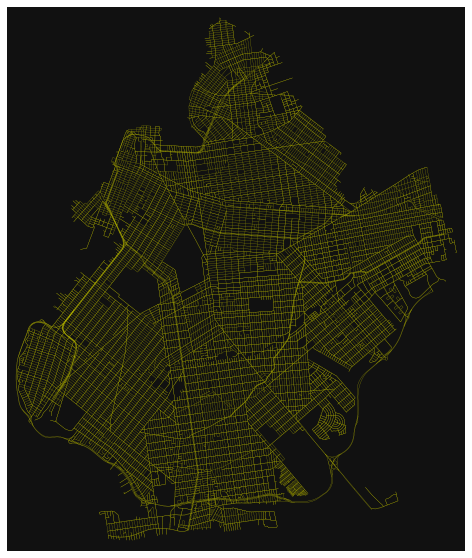

In [83]:
fig, ax = ox.plot_graph(G, figsize=(10, 10), node_size=0, edge_color='y', edge_linewidth=0.2)

In [90]:
destination_node = OSM_point_bike_deport.OSMID
origin_node = destination_node.copy()

In [92]:
distance_in_meters = pd.DataFrame()
for i in range(len(origin_node)):
    s=[]
    for j in range(len(destination_node)):
        d = nx.shortest_path_length(G, origin_node[i], destination_node[j], weight='length')
        s.append(d)
    distance_in_meters[i] = s
        
        

/var/folders/03/pvwcmghs2hnc0s8_bdc7t7440000gn/T/ipykernel_6407/409284081.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  distance_in_meters[i] = s


In [94]:
distance_in_meters

,0,1,2,3,4,5,6,7,8,9,...,802,803,804,805,806,807,808,809,810,811
0,0.000,2695.145,2749.844,2941.212,2644.312,3226.907,3226.907,2699.218,3226.907,2622.211,...,3792.248,4012.269,4097.211,4091.304,3927.412,4097.211,4353.956,4787.182,3179.740,3252.390
1,2725.616,0.000,54.699,246.067,68.294,2934.311,2934.311,402.066,2934.311,630.631,...,3646.352,3866.373,3951.315,3945.408,3781.516,3951.315,4208.060,4641.286,3364.450,3437.100
2,2781.341,174.852,0.000,420.919,124.019,2879.612,2879.612,576.918,2879.612,766.864,...,3702.077,3922.098,4007.040,4001.133,3837.241,4007.040,4263.785,4697.011,3420.175,3492.825
3,2656.857,208.515,263.214,0.000,157.682,3142.826,3142.826,610.581,3142.826,642.380,...,3657.314,3877.335,3962.277,3956.370,3792.478,3962.277,4219.022,4652.248,3372.586,3445.236
4,2669.382,50.833,105.532,296.900,0.000,2985.144,2985.144,452.899,2985.144,654.905,...,3590.118,3810.139,3895.081,3889.174,3725.282,3895.081,4151.826,4585.052,3308.216,3380.866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,3872.481,3982.953,4037.652,4229.020,3932.120,6294.116,6294.116,4284.625,6294.116,4030.674,...,341.823,412.337,0.000,171.499,327.480,0.000,256.745,689.971,1268.884,1341.534
808,4129.226,4239.698,4294.397,4485.765,4188.865,6550.861,6550.861,4541.370,6550.861,4287.419,...,598.568,669.082,256.745,428.244,584.225,256.745,0.000,433.226,1525.629,1598.279
809,4278.542,4389.014,4443.713,4635.081,4338.181,6700.177,6700.177,4690.686,6700.177,4436.735,...,872.510,818.398,530.687,570.245,733.541,530.687,273.942,0.000,1674.945,1747.595
810,2740.436,3294.917,3349.616,3540.984,3244.084,5280.142,5280.142,3444.043,5280.142,3342.638,...,962.222,1198.210,1283.152,1277.245,1113.353,1283.152,1539.897,1973.123,0.000,72.650


In [95]:
distance=distance_in_meters.copy()

In [96]:
# assign 50 distance to some same demand nodes which distance is 0

for i in range(len(distance)):
    for j in range(len(distance)):
        if distance.loc[i][j] == 0 and i!=j:
            distance.loc[i][j] = 50
        else:
            pass

In [98]:
distance

,0,1,2,3,4,5,6,7,8,9,...,802,803,804,805,806,807,808,809,810,811
0,0.000,2695.145,2749.844,2941.212,2644.312,3226.907,3226.907,2699.218,3226.907,2622.211,...,3792.248,4012.269,4097.211,4091.304,3927.412,4097.211,4353.956,4787.182,3179.740,3252.390
1,2725.616,0.000,54.699,246.067,68.294,2934.311,2934.311,402.066,2934.311,630.631,...,3646.352,3866.373,3951.315,3945.408,3781.516,3951.315,4208.060,4641.286,3364.450,3437.100
2,2781.341,174.852,0.000,420.919,124.019,2879.612,2879.612,576.918,2879.612,766.864,...,3702.077,3922.098,4007.040,4001.133,3837.241,4007.040,4263.785,4697.011,3420.175,3492.825
3,2656.857,208.515,263.214,0.000,157.682,3142.826,3142.826,610.581,3142.826,642.380,...,3657.314,3877.335,3962.277,3956.370,3792.478,3962.277,4219.022,4652.248,3372.586,3445.236
4,2669.382,50.833,105.532,296.900,0.000,2985.144,2985.144,452.899,2985.144,654.905,...,3590.118,3810.139,3895.081,3889.174,3725.282,3895.081,4151.826,4585.052,3308.216,3380.866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,3872.481,3982.953,4037.652,4229.020,3932.120,6294.116,6294.116,4284.625,6294.116,4030.674,...,341.823,412.337,50.000,171.499,327.480,0.000,256.745,689.971,1268.884,1341.534
808,4129.226,4239.698,4294.397,4485.765,4188.865,6550.861,6550.861,4541.370,6550.861,4287.419,...,598.568,669.082,256.745,428.244,584.225,256.745,0.000,433.226,1525.629,1598.279
809,4278.542,4389.014,4443.713,4635.081,4338.181,6700.177,6700.177,4690.686,6700.177,4436.735,...,872.510,818.398,530.687,570.245,733.541,530.687,273.942,0.000,1674.945,1747.595
810,2740.436,3294.917,3349.616,3540.984,3244.084,5280.142,5280.142,3444.043,5280.142,3342.638,...,962.222,1198.210,1283.152,1277.245,1113.353,1283.152,1539.897,1973.123,0.000,72.650


In [99]:
distance.to_csv('./Dis_Bike.csv')

In [105]:
# change deport to ups

OSM_point_van_deport = OSM_point_bike_deport.copy()

In [107]:
ox.distance.nearest_nodes(G,-73.9019427,40.6527329)

42482069

In [120]:
G.nodes[42482069]['x']

-73.901651

In [133]:
# UPS deport (40.6527329 -73.9019427)

vandeport = pd.DataFrame({'Geographic Area Name':['UPS'],'lon':[-73.9019427],'lat':[40.6527329],'coordinates':[(40.6527329,-73.9019427)],\
             'OSMID':[ox.distance.nearest_nodes(G,-73.9019427,40.6527329)],'OSM_lon':[G.nodes[42482069]['x']],\
             'OSM_lat':[G.nodes[42482069]['y']]})
vandeport.head()

,Geographic Area Name,lon,lat,coordinates,OSMID,OSM_lon,OSM_lat
0,UPS,-73.901943,40.652733,"(40.6527329, -73.9019427)",42482069,-73.901651,40.653752


In [140]:
OSM_point_van_deport = OSM_point_bike_deport[1:].append(vandeport).sort_index()
OSM_point_van_deport.head()

,Geographic Area Name,Population,cdtaname,boroname_left,cdta2020,geoid,Demand,lon,lat,coordinates,OSMID,OSM_lon,OSM_lat,geometry
0,UPS,NaN,NaN,NaN,NaN,NaN,NaN,-73.901943,40.652733,"(40.6527329, -73.9019427)",42482069,-73.901651,40.653752,None
1,"Block 1000, Block Group 1, Census Tract 1, Kin...",25.0,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001000,1.0,-73.994139,40.702474,"(40.70247439268394,-73.99413859995671)",3174844149,-73.993838,40.702615,POINT (-73.99384 40.70262)
2,"Block 1001, Block Group 1, Census Tract 1, Kin...",36.0,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001001,1.0,-73.994615,40.702615,"(40.70261488193135,-73.99461527000922)",3174844141,-73.994421,40.702830,POINT (-73.99442 40.70283)
3,"Block 1004, Block Group 1, Census Tract 1, Kin...",14.0,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001004,1.0,-73.993401,40.701283,"(40.70128292945475,-73.99340112808582)",6720148786,-73.993367,40.701572,POINT (-73.99337 40.70157)
4,"Block 1005, Block Group 1, Census Tract 1, Kin...",182.0,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001005,4.0,-73.993468,40.702211,"(40.70221089237134,-73.9934679333486)",3174844145,-73.993300,40.702408,POINT (-73.99330 40.70241)


In [143]:
destination_node = OSM_point_van_deport.OSMID
origin_node = destination_node.copy()

In [144]:
distance_in_meters = pd.DataFrame()
for i in range(len(origin_node)):
    s=[]
    for j in range(len(destination_node)):
        d = nx.shortest_path_length(G, origin_node[i], destination_node[j], weight='length')
        s.append(d)
    distance_in_meters[i] = s
        
        

/var/folders/03/pvwcmghs2hnc0s8_bdc7t7440000gn/T/ipykernel_6407/409284081.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  distance_in_meters[i] = s


In [145]:
distance=distance_in_meters.copy()

for i in range(len(distance)):
    for j in range(len(distance)):
        if distance.loc[i][j] == 0 and i!=j:
            distance.loc[i][j] = 50
        else:
            pass

In [146]:
distance.to_csv('./Dis_Van.csv')

In [149]:
distance

,0,1,2,3,4,5,6,7,8,9,...,802,803,804,805,806,807,808,809,810,811
0,0.000,11421.904,11476.603,11667.971,11371.071,12039.825,12039.825,11470.023,12039.825,11393.016,...,9408.190,9666.532,9750.013,9756.582,9581.675,9750.013,9800.901,10051.656,8890.017,8817.367
1,11423.985,0.000,54.699,246.067,68.294,2934.311,2934.311,402.066,2934.311,630.631,...,3646.352,3866.373,3951.315,3945.408,3781.516,3951.315,4208.060,4641.286,3364.450,3437.100
2,11479.710,174.852,0.000,420.919,124.019,2879.612,2879.612,576.918,2879.612,766.864,...,3702.077,3922.098,4007.040,4001.133,3837.241,4007.040,4263.785,4697.011,3420.175,3492.825
3,11355.226,208.515,263.214,0.000,157.682,3142.826,3142.826,610.581,3142.826,642.380,...,3657.314,3877.335,3962.277,3956.370,3792.478,3962.277,4219.022,4652.248,3372.586,3445.236
4,11367.751,50.833,105.532,296.900,0.000,2985.144,2985.144,452.899,2985.144,654.905,...,3590.118,3810.139,3895.081,3889.174,3725.282,3895.081,4151.826,4585.052,3308.216,3380.866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,9800.154,3982.953,4037.652,4229.020,3932.120,6294.116,6294.116,4284.625,6294.116,4030.674,...,341.823,412.337,50.000,171.499,327.480,0.000,256.745,689.971,1268.884,1341.534
808,9771.818,4239.698,4294.397,4485.765,4188.865,6550.861,6550.861,4541.370,6550.861,4287.419,...,598.568,669.082,256.745,428.244,584.225,256.745,0.000,433.226,1525.629,1598.279
809,9927.269,4389.014,4443.713,4635.081,4338.181,6700.177,6700.177,4690.686,6700.177,4436.735,...,872.510,818.398,530.687,570.245,733.541,530.687,273.942,0.000,1674.945,1747.595
810,8882.534,3294.917,3349.616,3540.984,3244.084,5280.142,5280.142,3444.043,5280.142,3342.638,...,962.222,1198.210,1283.152,1277.245,1113.353,1283.152,1539.897,1973.123,0.000,72.650


In [157]:
OSM_point_van_deport['Demand'] = OSM_point_van_deport.Demand.fillna(0)

In [161]:
OSM_point_van_deport = OSM_point_van_deport.drop('geometry',axis=1)
OSM_point_van_deport.head()

,Geographic Area Name,Population,cdtaname,boroname_left,cdta2020,geoid,Demand,lon,lat,coordinates,OSMID,OSM_lon,OSM_lat
0,UPS,NaN,NaN,NaN,NaN,NaN,0.0,-73.901943,40.652733,"(40.6527329, -73.9019427)",42482069,-73.901651,40.653752
1,"Block 1000, Block Group 1, Census Tract 1, Kin...",25.0,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001000,1.0,-73.994139,40.702474,"(40.70247439268394,-73.99413859995671)",3174844149,-73.993838,40.702615
2,"Block 1001, Block Group 1, Census Tract 1, Kin...",36.0,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001001,1.0,-73.994615,40.702615,"(40.70261488193135,-73.99461527000922)",3174844141,-73.994421,40.702830
3,"Block 1004, Block Group 1, Census Tract 1, Kin...",14.0,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001004,1.0,-73.993401,40.701283,"(40.70128292945475,-73.99340112808582)",6720148786,-73.993367,40.701572
4,"Block 1005, Block Group 1, Census Tract 1, Kin...",182.0,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001005,4.0,-73.993468,40.702211,"(40.70221089237134,-73.9934679333486)",3174844145,-73.993300,40.702408


In [164]:
geometry = [Point(xy) for xy in zip(OSM_point_van_deport['OSM_lon'], OSM_point_van_deport['OSM_lat'])]
gdf = gpd.GeoDataFrame(OSM_point_van_deport, crs="EPSG:4326", geometry=geometry)

In [176]:
gdf[['Geographic Area Name','Population','Demand','OSM_lon','OSM_lat','geometry']]

,Geographic Area Name,Population,Demand,OSM_lon,OSM_lat,geometry
0,UPS,NaN,0.0,-73.901651,40.653752,POINT (-73.90165 40.65375)
1,"Block 1000, Block Group 1, Census Tract 1, Kin...",25.0,1.0,-73.993838,40.702615,POINT (-73.99384 40.70262)
2,"Block 1001, Block Group 1, Census Tract 1, Kin...",36.0,1.0,-73.994421,40.702830,POINT (-73.99442 40.70283)
3,"Block 1004, Block Group 1, Census Tract 1, Kin...",14.0,1.0,-73.993367,40.701572,POINT (-73.99337 40.70157)
4,"Block 1005, Block Group 1, Census Tract 1, Kin...",182.0,4.0,-73.993300,40.702408,POINT (-73.99330 40.70241)
...,...,...,...,...,...,...
807,"Block 2001, Block Group 2, Census Tract 545, K...",1234.0,27.0,-73.966322,40.704826,POINT (-73.96632 40.70483)
808,"Block 1004, Block Group 1, Census Tract 547, K...",108.0,3.0,-73.967280,40.707003,POINT (-73.96728 40.70700)
809,"Block 3004, Block Group 3, Census Tract 547, K...",1359.0,29.0,-73.968436,40.708478,POINT (-73.96844 40.70848)
810,"Block 1002, Block Group 1, Census Tract 1237, ...",307.0,7.0,-73.960621,40.696320,POINT (-73.96062 40.69632)


In [177]:
gdf[['Geographic Area Name','Population','Demand','OSM_lon','OSM_lat','geometry']].to_file('./OSM_point_van_deport.geojson')

In [ ]:
# bike distance